In [10]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

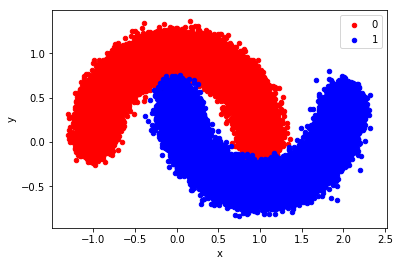

In [80]:
# generate 2d classification dataset
x, y = make_moons(n_samples=100000, noise=0.1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [106]:
alpha, epochs = 0.003, 500
m, n = x.shape 
#y = np.expand_dims(y, axis=0)
y = y.reshape(m, 1)
print('m =', m) 
print('n =', n) 
print('q =', q) 
print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs)

m = 100000
n = 2
q = (100000,)
Learning Rate = 0.003
Number of Epochs = 500


In [107]:
X = tf.placeholder(tf.float32, [None, n])
# y can only take two values
Y = tf.placeholder(tf.float32, [m, None])
# trainable variable weights
W = tf.Variable(tf.zeros([n, 1]))
# trainable variable bias
b = tf.Variable(tf.zeros([1]))

In [108]:
# hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))
# sigmoid cross entropy cost function
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
    logits = Y_hat, labels = Y)
# Gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(
        learning_rate = alpha).minimize(cost)
# global variables initializer
init = tf.global_variables_initializer()

In [114]:
# start session
saver = tf.train.Saver()
with tf.Session() as sess:
    #initialize variables
    sess.run(init)
    #lists for storing and chaning Cost and Accuracy
    cost_history, accuracy_history = [], []
    # Iterating through all the epochs
    for epoch in range(epochs):
        cost_per_epoch = 0
        
        # Optimizer
        sess.run(optimizer, feed_dict = {X : x, Y : y})
        # Calculate cost on current Epoch
        c = sess.run(cost, feed_dict = {X : x, Y : y})
        
        # Calculating accuracy on current Epoch
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                         tf.float32))
        # Storing Cost and Accuracy to the history
        cost_history.append(sum(sum(c)))
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)
        
        # Displaying result on current Epoch
        if epoch % 100 == 0 and epoch !=0:
            print("Epoch " + str(epoch) + "Cost: "
                 + str(cost_history[-1]))
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
            sess.run(optimizer, feed_dict={X: x, Y: y})
    
    Weight = sess.run(W) # Optimized Weight
    Bias = sess.run(b) # Optimized bias
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")
    
    #Final Accuracy
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                                 tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                     tf.float32))
    print("\nAccuracy:", accuracy_history[-1], "%")

Epoch 100Cost: 55789.2734375
Epoch 200Cost: 55789.0
Epoch 300Cost: 55788.97265625
Epoch 400Cost: 55788.81640625

Accuracy: 100.0 %


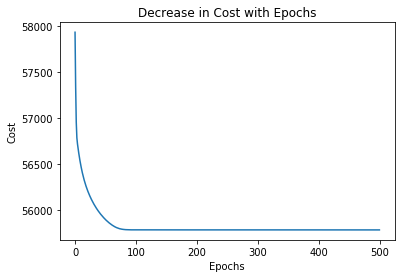

In [115]:
plt.plot(list(range(epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
  
plt.show() 